<a href="https://colab.research.google.com/github/james60415/0526/blob/main/lstm_%E5%AE%B6%E9%BD%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#引進資料
data = pd.read_csv(r'C:\Users\user\Desktop\material\實驗室\lstm\LSTM 實作練習 K_data_2_de-oulier_w_days.csv')
data

,No,TIME,HV_MCB_NUMBER,day,VIST_CNT,Pressure,OATemperature,RH,WS,WD,RAIN
0,0,2018/1/1 00:00,37600,1,20064,1013.8,16.3,77,2.0,83,0.0
1,1,2018/1/2 00:00,36000,2,10698,1011.7,19.5,75,2.0,82,0.0
2,2,2018/1/3 00:00,36800,3,10593,1010.9,20.8,72,1.9,74,0.0
3,3,2018/1/4 00:00,38400,4,11139,1008.7,20.1,82,0.8,253,0.0
4,4,2018/1/5 00:00,37600,5,13552,1009.6,16.4,93,1.1,75,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1682,1726,2022/9/26 00:00,43200,5,8094,1001.7,27.4,83,1.5,79,4.0
1683,1727,2022/9/27 00:00,44000,6,8398,1001.3,28.0,69,1.7,75,0.0
1684,1728,2022/9/28 00:00,48000,7,8780,1001.0,28.6,67,1.2,78,0.0
1685,1729,2022/9/29 00:00,40000,1,8596,1002.8,29.2,69,0.8,73,0.0


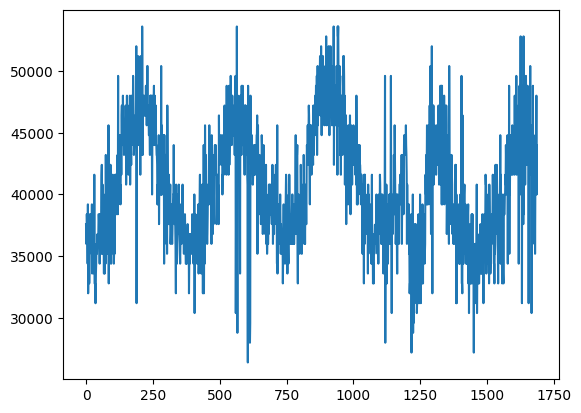

In [ ]:
#資料前處理-設x,y
x = data.drop([ 'No', 'TIME', 'day' ], axis=1)
y = data['HV_MCB_NUMBER'].values
# x = data.drop([ 'No', 'TIME', 'revenue', 'Power Consumption' ], axis=1)
# y = data['Power Consumption'].values
plt.plot(y)

In [ ]:
#資料scaling及訓練測試資料分割
trainxscaler = preprocessing.MinMaxScaler()
trainyscaler = preprocessing.MinMaxScaler()

tempx_train = trainxscaler.fit_transform(x[:1300])
tempy_train = trainyscaler.fit_transform(y[:1300].reshape(-1,1))

tempx_test = trainxscaler.transform(x[1300:])
tempy_test = trainyscaler.transform(y[1300:].reshape(-1,1))

#設定資料timestep
day = 8
trainx = []
trainy = []
for i in range(len(tempx_train) - day):
    trainx.append(tempx_train[i:i + day])
    trainy.append(tempy_train[i + day])

trainx = np.array(trainx)
trainy = np.array(trainy)

testx = []
testy = []
for i in range(len(tempx_test) - day):
    testx.append(tempx_test[i:i + day])
    testy.append(tempy_test[i + day])
testx = np.array(testx)
testy = np.array(testy)

In [ ]:
#LSTM模型建置&訓練
model = Sequential()
model.add(LSTM(32, return_sequences = False, input_shape = (day, 8)))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse' , metrics = ['mse'])
history = model.fit(trainx, trainy, epochs=20, batch_size=1, validation_split=0.10)


Epoch 1/20
1162/1162 [==============================] - 3s 2ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 2/20
1162/1162 [==============================] - 2s 1ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 3/20
1162/1162 [==============================] - 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 4/20
1162/1162 [==============================] - 2s 1ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 5/20
1162/1162 [==============================] - 2s 1ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 6/20
1162/1162 [==============================] - 2s 1ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 7/20
1162/1162 [==============================] - 2s 1ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 8/20
1162/1162 [==============================] - 2s 1ms

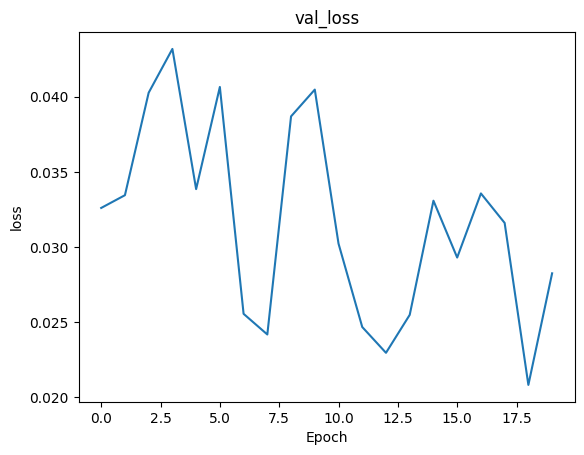

In [ ]:
#Loss圖繪製
plt.title('val_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["val_loss"])


12/12 [==============================] - 0s 910us/step


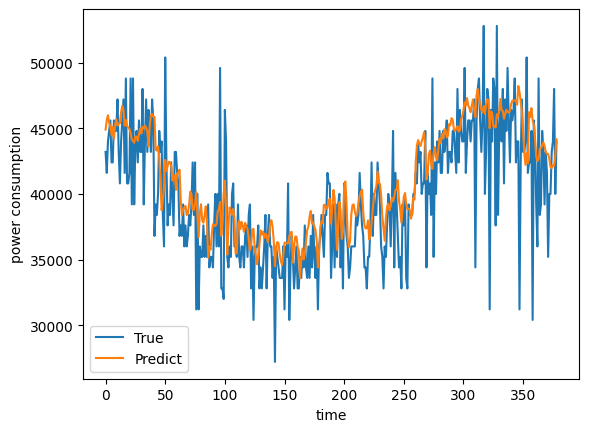

r2:    0.48989753232276434
MAPE:  0.06692476144787085


,預測值,實際值,mae
0,44902.156250,43200.0,1702.156250
1,45615.109375,41600.0,4015.109375
2,45995.367188,44000.0,1995.367188
3,45388.457031,44800.0,588.457031
4,45138.335938,45600.0,461.664062
...,...,...,...
374,41961.050781,43200.0,1238.949219
375,42188.921875,44000.0,1811.078125
376,42124.898438,48000.0,5875.101562
377,42924.531250,40000.0,2924.531250


In [ ]:
#預測測試集答案
predict = model.predict(testx)

#評估各類指標
predict = trainyscaler.inverse_transform(predict)
testy = trainyscaler.inverse_transform(testy)

predict = pd.DataFrame(predict).rename(columns={0: '預測值'})
testy = pd.DataFrame(testy).rename(columns={0: '實際值'})
final = pd.concat([predict,testy], axis=1)
final['mae'] = abs(final['預測值'] - final['實際值'])
plt.xlabel('time')
plt.ylabel('power consumption')
plt.plot(testy, label = 'True')
plt.plot(predict, label = 'Predict')
plt.legend()
plt.show()
print('r2:   ',r2_score(testy,predict))
print('MAPE: ', mean_absolute_percentage_error(testy,predict))
final


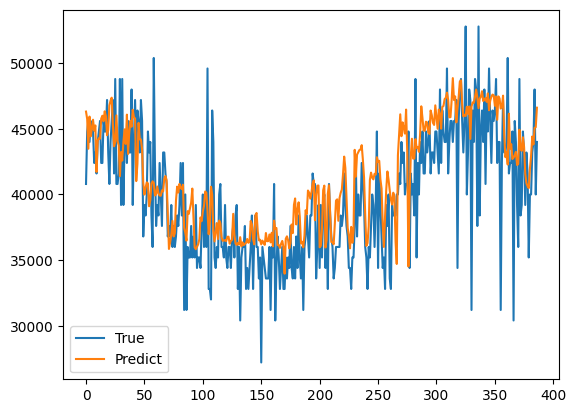

r2:    0.4278233473340721
MAPE:  0.07176417728050856


In [ ]:
#隨機森林預測結果
data = pd.read_csv(r'C:\Users\user\Desktop\material\實驗室\lstm\LSTM 實作練習 K_data_2_de-oulier_w_days.csv')
x = data.drop([ 'No', 'TIME', 'day', 'HV_MCB_NUMBER' ], axis=1)
y = data['HV_MCB_NUMBER'].values

trainx1=x[:1300]
trainy1=y[:1300]
testx1=x[1300:]
testy1=y[1300:]
RandomForestClassifier_model=RandomForestRegressor(max_depth=8)
RandomForestClassifier_model.fit(trainx1,trainy1)
predict = RandomForestClassifier_model.predict(testx1)
plt.plot(testy1,label = 'True')
plt.plot(predict,label = 'Predict')
plt.legend()
plt.show()
print('r2:   ',r2_score(testy1,predict))
print('MAPE: ', mean_absolute_percentage_error(testy1,predict))
